In [1]:
import pandas as pd

In [7]:
df= pd.read_csv("IMDB Dataset.csv")
print(df)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


## Data Preprocessing  
### FIrst step: lower()

In [8]:
df['review'][3].lower()

"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.<br /><br />ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

In [9]:
df['review'].str.lower() # is fatser and memory efficient than using df['review'] = df['review'].apply(lambda x:x.lower())

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. <br /><br />the...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

## second step:
this data might be  acquired through web scrapping thats why it contains  html tags and thse has to be removed as part of preprocessing

In [10]:
import re  # re= regular expression
def remove_html_tags(text):
    pattern = re.compile('<.*?>')   # re.compile(r'https?://\S+|www\.\S+') used to remove url in text
    return pattern.sub(r'',text)
'''function takes a text input, compiles a regular expression pattern to 
match HTML tags, and then uses that pattern to remove all HTML tags 
from the input text, returning the cleaned text without HTML tags.'''

'function takes a text input, compiles a regular expression pattern to \nmatch HTML tags, and then uses that pattern to remove all HTML tags \nfrom the input text, returning the cleaned text without HTML tags.'

In [11]:
# Example how html tags will be removed
text= "basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.<br /><br />ok"
text =remove_html_tags(text)
text

"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.ok"

In [12]:
# now removing html tags from the data
df['review']= df['review'].apply(remove_html_tags)

In [13]:
df['review']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. The filming tec...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

### to remove punctuation if need be use following code:


In [15]:
import string
exclude = string.punctuation

'''def remove_punct(text):
    return text.translate(str.maketrans('','',exclude))'''
    
    #now apply to dataset:
df['tweet']= df['tweet'].apply(remove_punct)

KeyError: 'tweet'

### for spelling mistake correction

In [13]:
from textblob import TextBlob

In [15]:
incorrect = 'I luv datta sceincee feeld.'
textblb = TextBlob(incorrect)
textblb.correct().string

'I lui data science field.'

### Removing stop words 

In [12]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
# DONT EXECUTE
# please read the 4th line
def remove_stopwords(text):
    new_text=[]
    for word in text.split():
        if word in stopwords.words('english'): # this line means stopword list is recomputes at every iteration (performance issue so better code is on next cell)
            new_text.append('')
        else:
            new_text.append(word)
    
    x= new_text[:]
    new_text.clear()
    return " ".join(x)

In [14]:
df['review'][8]

"Encouraged by the positive comments about this film on here I was looking forward to watching this film. Bad mistake. I've seen 950+ films and this is truly one of the worst of them - it's awful in almost every way: editing, pacing, storyline, 'acting,' soundtrack (the film's only song - a lame country tune - is played no less than four times). The film looks cheap and nasty and is boring in the extreme. Rarely have I been so happy to see the end credits of a film. The only thing that prevents me giving this a 1-score is Harvey Keitel - while this is far from his best performance he at least seems to be making a bit of an effort. One for Keitel obsessives only."

In [15]:
remove_stopwords('Encouraged by the positive comments about this film on here I was looking forward to watching this film.Encouraged by the positive comments about this film on here I was looking forward to watching this film.Encouraged by the positive comments about this film on here I was looking forward to watching this film')

'Encouraged   positive comments   film   I  looking forward  watching  film.Encouraged   positive comments   film   I  looking forward  watching  film.Encouraged   positive comments   film   I  looking forward  watching  film'

**'I' is not filtered here , we need to lower case data first

## Handelling emojis:
either you remove or replace it with its meaning

In [16]:
## removing 

import re

def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"    # emoticons
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F1E0-\U0001F1FF"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


In [17]:
remove_emoji("loved the movie. It was 🙄 🚗 ")

'loved the movie. It was   '

In [18]:
## adding meaning
import emoji
print(emoji.demojize('python is 👻' ))

python is :ghost:


### Tokenization

Tokenization is the process of breaking down a piece of text into smaller units called tokens. These tokens could be words, characters, or other meaningful units depending on the context 

Tokenization issues:

prefix= characters at the begining e.g. $("

suffix= characters at the end  e.g. Km),.

infix =  characters in between   e.g. -/

exception = special case rule to split a string into several tokens 

or prevent token from being split when punctuation applied  e.g. Let's. U.S.A

In [19]:
from nltk.tokenize import word_tokenize

In [20]:
sent1= 'I have a Ph.D in A.I.'
sent2= "we're here to  to help! mail us at nks@gmail.com"
sent3= ' A 5km ride cost $10.5'

In [21]:
word_tokenize(sent1)

['I', 'have', 'a', 'Ph.D', 'in', 'A.I', '.']

In [22]:
sent2tok = word_tokenize(sent2)
print(sent2tok)

['we', "'re", 'here', 'to', 'to', 'help', '!', 'mail', 'us', 'at', 'nks', '@', 'gmail.com']


In [23]:
word_tokenize(sent3)

['A', '5km', 'ride', 'cost', '$', '10.5']

In [26]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [27]:
!python -m spacy download en_core_web_sm

                                              0.0/12.8 MB ? eta -:--:--
                                             0.0/12.8 MB 320.0 kB/s eta 0:00:40
                                             0.0/12.8 MB 320.0 kB/s eta 0:00:40
                                             0.0/12.8 MB 186.2 kB/s eta 0:01:09
                                             0.0/12.8 MB 195.7 kB/s eta 0:01:06
                                             0.0/12.8 MB 195.7 kB/s eta 0:01:06
                                             0.0/12.8 MB 195.7 kB/s eta 0:01:06
                                             0.1/12.8 MB 181.6 kB/s eta 0:01:11
                                             0.1/12.8 MB 199.1 kB/s eta 0:01:04
                                             0.1/12.8 MB 199.1 kB/s eta 0:01:04
                                             0.1/12.8 MB 180.8 kB/s eta 0:01:11
                                             0.1/12.8 MB 180.8 kB/s eta 0:01:11
                                             0.1

In [25]:
import spacy
nlp = spacy.load('en_core_web_sm')
nlp

In [26]:
doc1= nlp(sent1)

In [27]:
doc1

I have a Ph.D in A.I.

In [28]:
doc2= nlp(sent2)
doc2

we're here to  to help! mail us at nks@gmail.com

In [29]:
doc3= nlp(sent3)
doc3

 A 5km ride cost $10.5

Spacy much better than tokenization. campus x said if project is not complex NLTK would be enough

### Stemming

Inflection is modification of a word to express  different grammatical categories such as tense, case,voice,aspect,mood,gender etc.

Stemming:

Stemming is a text normalization technique used in natural language processing and information retrieval to reduce words to their root or base form even if the stem itself is not a valid word in the language, called a stem.

**Important:**

Here u can see words after stemming stemmed words does not convey the same meaning as the original words also stemmed word often is not proper english word.

stemming works on algorithm while lemmatizaition uses wordnetlemmatizer to find dictionary word.

**Disadvantages of portal stemmer and snowball stemmer:**

1.Over-stemming and Under-stemming: Both stemmers may suffer from over-stemming (reducing words too aggressively, leading to loss of meaning) or under-stemming (not reducing words enough, resulting in incomplete normalization).

2.stemmed word often doesnt convey the  the true meaning

3.Word Ambiguity: Both stemmers may have difficulties with ambiguous words that can have multiple meanings or functions

In [30]:
from nltk.stem.porter import PorterStemmer

In [31]:
ps= PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [32]:
sample = 'Encouraged by the positive comments about this film on here I was looking forward to watching this film.'
stem_words(sample)

'encourag by the posit comment about thi film on here i wa look forward to watch thi film.'

### Lemmatization

Lammetization unlike stemming reduces inflected words properly ensuring that the root word belongs to the language.

Lemmatization technique is like stemming. The output we will get after lemmatization is called ‘lemma’, which is a root word. After lemmatization, we will be getting a valid word.

NLTK provides WordNetLemmatizer class which is a thin wrapper around the wordnet corpus. This class uses morphy() function to the WordNet CorpusReader class to find a lemma.

In [33]:
## Q&A,chatbots,text summarization
from nltk.stem import WordNetLemmatizer

lemmatizer=WordNetLemmatizer()

In [34]:
words=["eating","eats","eaten","writing","writes","programming","programs","history","finally","finalized"]
for word in words:
    print(word+"==="+ lemmatizer.lemmatize(word,pos = 'n'))  ''' pos='n' is specifying the part of speech (POS) tag of the
    word you want to convert it into. In this case, 'n' stands for noun.'''

eating===eating
eats===eats
eaten===eaten
writing===writing
writes===writes
programming===programming
programs===program
history===history
finally===finally
finalized===finalized


In [35]:
words=["eating","eats","eaten","writing","writes","programming","programs","history","finally","finalized"]
for word in words:
    print(word+"==="+ lemmatizer.lemmatize(word,pos = 'v'))
    

eating===eat
eats===eat
eaten===eat
writing===write
writes===write
programming===program
programs===program
history===history
finally===finally
finalized===finalize


## Text Representation

In [ ]:

''' It is done by:
1. One hot encoding
2. BAg of words
3. ngram
4. TFIDF
5. custom feature
6. deep learning techniques = word2vec to construct embedding

Embeddings, on the other hand, are a way to convert words into a numerical form that 
deep learning algorithms can process.

Word embeddings can be trained using the input corpus itself or can be generated 
using pre-trained word embeddings such as Glove, FastText, and Word2Vec.'''

In [ ]:
'''
terms:
**corpus**= total words in data
**vocabulary** = unique words in corpus is vocablary
**document**= document typically refers to a single piece of text that is to be
processed or analyzed. This could be a sentence, a paragraph, an article, a book
**word**= every word in document is word then right?'''

### One hot encoding

pros : EAsy to implement
cons: given in BOW 

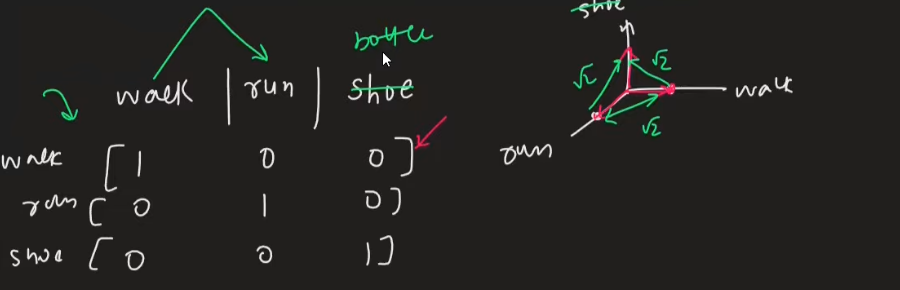

### Bag of words
very useful in text classifcation.

its the frequency of words in vocb appearing in document. Its nothing but application of one hot encoding to text data. 

order of word and context doesnt matter and that is a disadvantage.


**Cons / Limitations of Bag of Words (BoW) in NLP:

1.Ignores word order (syntax lost)

    “Dog bites man” and “Man bites dog” get the same representation (vector representation), but meanings are totally different.

2.No semantic understanding

    Synonyms like good and nice are unrelated.

    Polysemy problem: same word, different meanings (e.g., bank).

3.High dimensional & sparse vectors

    Vocabulary size suppose is 30k in corpus of 1L. One document has maybe 100 words Vocabulary = [apple, banana, cat, dog...]
    So:

    ~100 non-zero values

    ~29,900 zeros

    ➡️ This is the sparsity problem

    Leads to: High memory usage, overfitting (especially with small datasets)

4.Vocabulary dependency (OOV problem)

    New/unseen words in test data are ignored or cause issues.

 
5.No notion of context

    Cannot capture negation properly: “not good” vs “good”

    Relationships between nearby words

6.Equal importance to all words (unless weighted)

    Plain BoW counts frequency only.

    Common but uninformative words may dominate (unless stopwords removed).

    TF-IDF helps, but still limited.

7.Poor performance on long texts

    Long documents may have similar word counts but very different meanings.

8.Not robust to morphology

    “run”, “running”, “ran” treated as different features

    Needs stemming/lemmatization preprocessing

In [20]:
import numpy as np
import pandas as pd

# Creating a DataFrame with text and output
dff = pd.DataFrame({
    'text': [
        'people watch campusx', 
        'campusx watch campusx', 
        'people write comment', 
        'campusx write comment'], 
    'output': [1, 1, 0, 0]})

# Importing CountVectorizer from sklearn.feature_extraction.text
from sklearn.feature_extraction.text import CountVectorizer

# Initializing CountVectorizer
cv = CountVectorizer()

In [21]:
dff         #output is 1,0becuse by default binary= False. We sett it True in Sentimental analysis so any word occuring more than once would be reduced to 1 only

text  output
0   people watch campusx       1
1  campusx watch campusx       1
2   people write comment       0
3  campusx write comment       0

In [22]:
bow = cv.fit_transform(dff['text'])
# learns the vocabulary from the text column

In [25]:
print(cv.vocabulary_)
# u will get name of column and  its index means people  column is at 2nd index 

{'people': 2, 'watch': 3, 'campusx': 0, 'write': 4, 'comment': 1}


In [40]:
print(bow[0].toarray())
# campus presesnt in bow[0] so 1 comment absent so 0 people present so 1 watch pressent so 1  and write absent so 0

[[1 0 1 1 0]]


In [41]:
print(bow[1].toarray())

[[2 0 0 1 0]]


In [42]:
cv.transform(["campusx watch and write comment of campusx"]).toarray()

array([[2, 1, 0, 1, 1]], dtype=int64)

## Ngram

Till now our vocabulaty was of one word and so we were not able to capture the meaning of sentence. Ngram solves this problem 
where we use multiple words to make vocabulary. this way we can create Bigram, Trigram. Two adajcent words are bigram and threee trigram.

e.g. bigrams would be: “I love”, “love dogs”.
The trigrams would be: “I love dogs”.

In [85]:
import numpy as np
import pandas as pd

# Creating a DataFrame with text and output
dff = pd.DataFrame({
    'text': [
        'people watch campusx', 
        'campusx watch campusx', 
        'people write comment', 
        'campusx write comment'], 
    'output': [1, 1, 0, 0]})

# Importing CountVectorizer from sklearn.feature_extraction.text
from sklearn.feature_extraction.text import CountVectorizer

# Initializing CountVectorizer
cv = CountVectorizer(ngram_range=(2,2))

In [87]:
dff

text  output
0   people watch campusx       1
1  campusx watch campusx       1
2   people write comment       0
3  campusx write comment       0

In [88]:
bow = cv.fit_transform(dff['text'])

In [89]:
bigram = print(cv.vocabulary_)

{'people watch': 2, 'watch campusx': 4, 'campusx watch': 0, 'people write': 3, 'write comment': 5, 'campusx write': 1}


COns:1. dimensionality of vocabulary increases from unigram to bigram and upward and no of dimension inceases so compuatation            increases.E.g. see BOW had 5 dimension of vocabulary and bigram as above had 6 dimension.
     2. No solution to OOV.

In [ ]:
## TFIDF

"""**TF (Term Frequency)**------

It measures how often a term (word) appears in a document.
It's calculated as the number of times a term appears in a document divided by the total number of terms in the document. 
The idea is that the more times a term appears in a document, the more weight it gets but actually no new information  is added. 

**IDF (Inverse Document Frequency):--------

It measure how many times a word has appeard in all documents\ corpus. Thus helps in generalization by down weights 
word that appear in many documents.

**in nutshell we check how frequent is term in a given document and how unique it is in entire corpus.**"""

# TFIDF output is **sparse document vectors**. Since most documents only contain a small fraction of the total vocabulary, most entries in the vector are zero. That’s why we call it a sparse document vector — it’s high‑dimensional with many zeros.”
"""Why TF-IDF helps linear models

Common words → low TF-IDF → small impact in sum help reduce overfitting

Rare, meaningful words → high TF-IDF → big impact

So the weighted sum becomes more informative, leading to better predictions"""


| **Feature | BoW (CountVectorizer)        | TF-IDF                                                                                    |
| ------- | ---------------------------- | ------------------------------------------------------------------------------------- 

| Values  | Raw counts of words/ngrams   | Scaled by importance across corpus                                                        
| Effect  | All words treated equally    | Common words (“the”, “is”) get lower weight; 
                                           rare but informative words get higher weight
                                           
| Impact  | Frequent words dominate      | More signal from discriminative words                                                     
| Example | “good” appears 10 times → 10 | “good” appears 10 times but occurs in many docs → lower weight                            


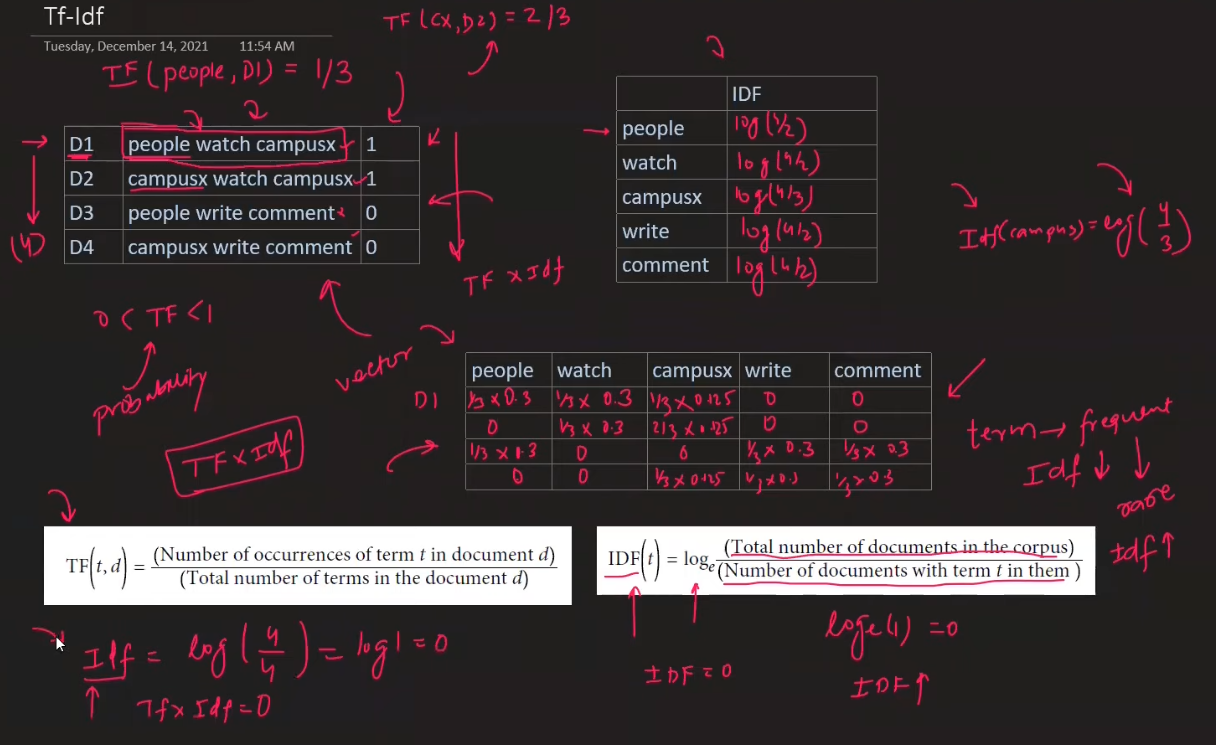

In [90]:
dff
no of documents N= 4
doc frequency df = campusx 3, people 2..

text  output
0   people watch campusx       1
1  campusx watch campusx       1
2   people write comment       0
3  campusx write comment       0

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'dff' is a DataFrame with a column named 'text'
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(dff['text']).toarray()
tfidf_matrix

# Common words get lower weight and Rare words get higher weight

array([[0.49681612, 0.        , 0.61366674, 0.61366674, 0.        ],
       [0.8508161 , 0.        , 0.        , 0.52546357, 0.        ],
       [0.        , 0.57735027, 0.57735027, 0.        , 0.57735027],
       [0.49681612, 0.61366674, 0.        , 0.        , 0.61366674]])

In [92]:
print(tfidf.idf_)
print(tfidf.get_feature_names_out())

[1.22314355 1.51082562 1.51082562 1.51082562 1.51082562]
['campusx' 'comment' 'people' 'watch' 'write']


THe tfidf value here are little larger than in the image(after multiplication done) becacuse their way to calculate idf is diff.
see image:
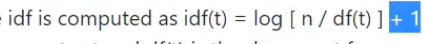

1. why added 1? 

see idf defination. if a word appears in all documnet of corpus then by defination if total docs are 4 and it appears in all docs means divided by 4 then log 1 is 0 and o multiplied by tf would be 0

2. Why we take log for IDF and not for TF?

tf is about how important a word in docoument and idf is how imp that word in corpus is. 

The reason we take the logarithm for IDF and not for TF can be explained with an example:

Suppose we have a corpus of documents containing 1,000 documents. We'll consider two words: "the" and "serendipity".

"the": This word is very common and likely to appear in almost every document in the corpus. Let's say it appears in 999 out of 1,000 documents.

"serendipity": This word is rare and might appear in only a few documents. Let's say it appears in 10 out of 1,000 documents.
Without taking the logarithm for IDF:

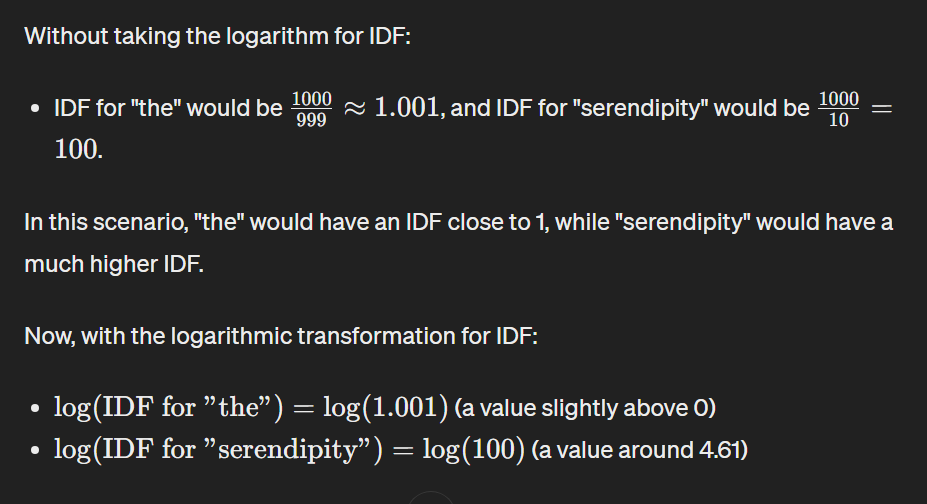

By taking the logarithm of IDF values, TF-IDF ensures that common words like "the" don't dominate the score, even though they might have high term frequencies. Instead, rarer words like "serendipity" can have a higher impact on the overall score, even if they appear less frequently, because their IDF values are much higher after logarithmic transformation. This balance allows TF-IDF to effectively highlight the importance of terms within documents while considering their uniqueness across the corpus.

Term frequency does not require this scaling because it’s already a normalized measure.
This is particularly useful in tasks like text classification and information retrieval 

Cons: 1. same as BOW the sparsity
      2. OOV 
      3. symantic relation not captured

Handcrafted features: often we have to create features in NLP aka custom features.

## Word2vec
It uses deep learning tech.
Best thing about them is they can capture symantic meaning.

vector in other embedding tech was high dimension but in word2vec it is low in dimension so computation becomes fast.

its a dense vector. other embeddings were sparse(more 0). here 0 will be less and non zero will be more and so no/little overfitting

In [1]:
import numpy as np
import pandas as pd

In [5]:
pip install blosc2~=2.0.0
# store and load large numerical arrays but not needed if we have gensim

SyntaxError: invalid syntax (3454456886.py, line 1)

In [ ]:
# pip install cython sentencepiece
"""cython compiler converts Python-like code into C code. Makes code run much faster. 
Without cython some NLP packages fail to install fall back to slow Python code

sentencepiece is Subword tokenizer developed by Google. Handles: unknown words,rare words,spelling variations.
Used in BERT GPT T5 XLNet"""


In [ ]:
# pip install gensim
# library for word embeddings & topic modeling use dfor word2vec,doc2vec,FastText,LDA

In [2]:
import gensim
import os

In [3]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess # it lowercases, strips punctuation, and ignores very short tokens.

story = []
for filename in os.listdir('GOT'):
    
    f = open(os.path.join('GOT',filename)) # ,encoding='utf-8', errors='ignore' could have been used to ensure unreadable characters are skipped but given GOT fils are cleaned ones we didnt use it.
    corpus = f.read()
    raw_sent = sent_tokenize(corpus)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))

"""We use NLTK tokenization instead of a regex-based tokenizer because NLTK applies language-specific rules 
and handles contractions (shortened forms of words) and punctuation more intelligently. 
NLTK helps preserve negation (e.g., “don’t” → “do + n’t”), which is important for sentiment analysis. 
Simple regex tokenizers may split contractions incorrectly and lose sentiment cues unless carefully designed."""

In [5]:
story

[['game',
  'of',
  'thrones',
  'book',
  'one',
  'of',
  'song',
  'of',
  'ice',
  'and',
  'fire',
  'by',
  'george',
  'martin',
  'prologue',
  'we',
  'should',
  'start',
  'back',
  'gared',
  'urged',
  'as',
  'the',
  'woods',
  'began',
  'to',
  'grow',
  'dark',
  'around',
  'them'],
 ['the', 'wildlings', 'are', 'dead'],
 ['do', 'the', 'dead', 'frighten', 'you'],
 ['ser',
  'waymar',
  'royce',
  'asked',
  'with',
  'just',
  'the',
  'hint',
  'of',
  'smile'],
 ['gared', 'did', 'not', 'rise', 'to', 'the', 'bait'],
 ['he',
  'was',
  'an',
  'old',
  'man',
  'past',
  'fifty',
  'and',
  'he',
  'had',
  'seen',
  'the',
  'lordlings',
  'come',
  'and',
  'go'],
 ['dead', 'is', 'dead', 'he', 'said'],
 ['we', 'have', 'no', 'business', 'with', 'the', 'dead'],
 ['are', 'they', 'dead'],
 ['royce', 'asked', 'softly'],
 ['what', 'proof', 'have', 'we'],
 ['will', 'saw', 'them', 'gared', 'said'],
 ['if',
  'he',
  'says',
  'they',
  'are',
  'dead',
  'that',
  'proof',


In [6]:
model = gensim.models.Word2Vec(
        window=10, # it considers up to 10 words before and after the target word.
        min_count=2) # Words that appear fewer than 2 times are ignored. (rare names that don’t add much to the model.)

"""Vector size depends mainly on corpus size and task complexity — NOT directly on vocabulary size.
It controls how much meaning a word vector can store.

every word is represented as a 100-dimensional dense vector  and it is balanced (recommended)
    More dimensions ---------more capacity to encode meaning
    Too many dimensions -----noise, slow training may lead overfitting
    
workers = 4 -------------Number of CPU threads used for training"""

'Vector size depends mainly on corpus size and task complexity — NOT directly on vocabulary size.\nIt controls how much meaning a word vector can store.\n\nevery word is represented as a 100-dimensional dense vector  and it is balanced (recommended)\n    More dimensions ---------more capacity to encode meaning\n    Too many dimensions -----noise, slow training may lead overfitting\n    \nworkers = 4 -------------Number of CPU threads used for training'

In [7]:
model.build_vocab(story) # It initializes the neural network weights for each word in the vocabulary

In [8]:
model.train(story,total_examples=model.corpus_count,epochs= model.epochs)

(6569710, 8628190)

In [58]:
model.wv.most_similar('daenerys')

[('targaryen', 0.7781115174293518),
 ('stormborn', 0.7665217518806458),
 ('princess', 0.7592783570289612),
 ('myrcella', 0.759236216545105),
 ('queen', 0.7384516596794128),
 ('margaery', 0.7026535272598267),
 ('viserys', 0.6998673677444458),
 ('unburnt', 0.6987279653549194),
 ('elia', 0.6821059584617615),
 ('rhaegar', 0.661957859992981)]

In [9]:
model.wv.doesnt_match(['jon','rikon','robb', 'arya','sansa'])
# finds the “odd one out” — the word least similar to the others in vector space.Uses cosine similarity of the embeddings

# since jon was adopted and other were brother-sister

'jon'

In [10]:
model.wv.similarity('arya','sansa')
# since they are sisters

0.8432808

In [11]:
model.wv.similarity('tywin','sansa')

0.21011847

In [12]:
model.wv.get_normed_vectors().shape

(17453, 100)

In [ ]:
#  17453 words in your vocabulary, and each word is represented by a vector of 100 dimensions.

In [13]:
model.wv.get_normed_vectors()

array([[-0.05433608, -0.12989563,  0.1269038 , ..., -0.14608787,
         0.0038605 , -0.02836312],
       [-0.09589513, -0.33154088,  0.05224118, ...,  0.02698368,
        -0.0330842 ,  0.13774982],
       [ 0.15669017, -0.07690175, -0.00199703, ...,  0.02349548,
         0.06824198,  0.0069577 ],
       ...,
       [ 0.05829616,  0.07900465,  0.00251586, ..., -0.04354227,
         0.03194411, -0.14693536],
       [-0.03793276, -0.02803225,  0.10970562, ...,  0.01057918,
         0.2518264 , -0.06786969],
       [-0.06210246,  0.12733431,  0.09630577, ..., -0.00382075,
         0.00400579, -0.08389157]], dtype=float32)

In [14]:
y= model.wv.index_to_key

In [15]:
y

['the',
 'and',
 'to',
 'of',
 'he',
 'his',
 'was',
 'you',
 'her',
 'in',
 'it',
 'had',
 'that',
 'she',
 'as',
 'with',
 'him',
 'not',
 'but',
 'for',
 'they',
 'is',
 'at',
 'on',
 'said',
 'my',
 'have',
 'be',
 'lord',
 'them',
 'no',
 'from',
 'would',
 'were',
 'me',
 'your',
 'one',
 'all',
 'when',
 'will',
 'ser',
 'if',
 'so',
 'their',
 'we',
 'could',
 'are',
 'man',
 'there',
 'this',
 'up',
 'been',
 'what',
 'did',
 'by',
 'king',
 'do',
 'men',
 'back',
 'out',
 'more',
 'or',
 'who',
 'down',
 'well',
 'than',
 'only',
 'like',
 'jon',
 'some',
 'father',
 'old',
 'hand',
 'even',
 'too',
 'tyrion',
 'before',
 'never',
 'an',
 'off',
 'see',
 'know',
 'into',
 'made',
 'now',
 'eyes',
 'black',
 'told',
 'lady',
 'thought',
 'time',
 'then',
 'how',
 'long',
 'has',
 'can',
 'might',
 'us',
 'come',
 'where',
 'here',
 'through',
 'still',
 'face',
 'head',
 'red',
 'll',
 'way',
 'boy',
 'page',
 'must',
 'once',
 'queen',
 'good',
 'two',
 'brother',
 'night',
 

In [ ]:
# means first array of vector belongs to word 'the'

In [67]:
from sklearn.decomposition import PCA

In [68]:
pca = PCA(n_components=3)


In [69]:
X = pca.fit_transform(model.wv.get_normed_vectors())


In [70]:
X.shape


(17453, 3)

In [ ]:
# thos 100 dimension are now 3 after pca

In [71]:
import plotly.express as px
fig = px.scatter_3d(X[200:300],x=0,y=1,z=2, color=y[200:300])
fig.show()   # we took vocab from 200:300 and not total 17453  as it would be exepensive

## TExt Classification

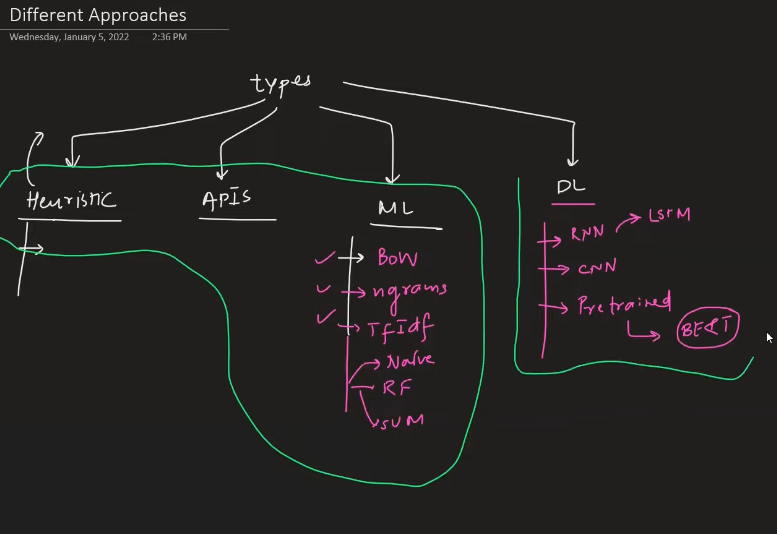

Heuristic approached used when we dont have enough data.

API woulg give diredt solution but it would cost. 

so we use ML

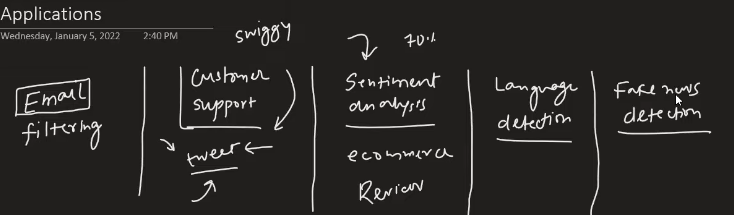

In [55]:
df1= df.iloc[:10000]

In [56]:
df1.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [57]:
df1['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [58]:
df1['sentiment'].value_counts()

positive    5028
negative    4972
Name: sentiment, dtype: int64

In [59]:
df1.isnull().sum()

review       0
sentiment    0
dtype: int64

In [60]:
df1.duplicated().sum()

17

In [61]:
df1.drop_duplicates(inplace= True)

C:\Users\Kiran\AppData\Local\Temp\ipykernel_10260\2487019364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace= True)


In [62]:
df1.duplicated().sum()

0

In [63]:
# Basic Preprocessing
# Remove tags
# lowercase
# remove stopwords

In [64]:
import re
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)# Find the pattern '<.*?>' (html) and replace it with '' (nothing).
    return cleaned_text

In [70]:
df1['review'] = df1['review'].apply(remove_tags)


C:\Users\Kiran\AppData\Local\Temp\ipykernel_10260\3663813444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['review'] = df1['review'].apply(remove_tags)


In [71]:
df1['review'][1]

'wonderful little production. filming technique unassuming- old-time-bbc fashion gives comforting, sometimes discomforting, sense realism entire piece. actors extremely well chosen- michael sheen "has got polari" voices pat too! truly see seamless editing guided references williams\' diary entries, well worth watching terrificly written performed piece. masterful production one great master\'s comedy life. realism really comes home little things: fantasy guard which, rather use traditional \'dream\' techniques remains solid disappears. plays knowledge senses, particularly scenes concerning orton halliwell sets (particularly flat halliwell\'s murals decorating every surface) terribly well done.'

In [72]:
df1['review'] = df1['review'].str.lower()


C:\Users\Kiran\AppData\Local\Temp\ipykernel_10260\3873833771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['review'] = df1['review'].str.lower()


In [73]:
from nltk.corpus import stopwords

sw_list = stopwords.words('english')

df1['review'] = df1['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))
# we remove stopwords  but do  tokenisation before it but here use of split() is basic tokenization using whitespace without going for it explicitly.

C:\Users\Kiran\AppData\Local\Temp\ipykernel_10260\2719152508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['review'] = df1['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))


In [74]:
df1['review'][1]

'wonderful little production. filming technique unassuming- old-time-bbc fashion gives comforting, sometimes discomforting, sense realism entire piece. actors extremely well chosen- michael sheen "has got polari" voices pat too! truly see seamless editing guided references williams\' diary entries, well worth watching terrificly written performed piece. masterful production one great master\'s comedy life. realism really comes home little things: fantasy guard which, rather use traditional \'dream\' techniques remains solid disappears. plays knowledge senses, particularly scenes concerning orton halliwell sets (particularly flat halliwell\'s murals decorating every surface) terribly well done.'

In [75]:
X = df1.iloc[:,0:1] # first : mean all rows and second : means 0 to 1 means only 0
"""Why do we often prefer 0:1?
Many ML models expect:2D input (X) even if there is only one feature"""

y = df1['sentiment']

In [76]:
X

review
0     one reviewers mentioned watching 1 oz episode ...
1     wonderful little production. filming technique...
2     thought wonderful way spend time hot summer we...
3     basically there's family little boy (jake) thi...
4     petter mattei's "love time money" visually stu...
...                                                 ...
9995  fun, entertaining movie wwii german spy (julie...
9996  give break. anyone say "good hockey movie"? kn...
9997  movie bad movie. watching endless series bad h...
9998  movie probably made entertain middle school, e...
9999  smashing film film-making. shows intense stran...

[9983 rows x 1 columns]

In [77]:
y

0       positive
1       positive
2       positive
3       negative
4       positive
          ...   
9995    positive
9996    negative
9997    negative
9998    negative
9999    positive
Name: sentiment, Length: 9983, dtype: object

In [78]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(y)

In [79]:
y

array([1, 1, 1, ..., 0, 0, 1])

In [80]:
df1['sentiment'].value_counts()
# Class ratio ≈ 50.3% vs 49.7% so no need to use class_weight='balanced' is not necessary SMOTE / oversampling is not needed

positive    5023
negative    4960
Name: sentiment, dtype: int64

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

# given a small size project we wont atke validation set. We will cross validate.

In [82]:
X_train.shape


(7986, 1)

In [83]:
# Applying BoW
from sklearn.feature_extraction.text import CountVectorizer

In [84]:
cv = CountVectorizer()

In [85]:
X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

In [86]:
X_train_bow.shape  
#''' 7986 are number of samples (document) in your training dataset and 48282 are number of
#features (unique words) in your dataset'''


(7986, 48282)

In [87]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train_bow,y_train)

GaussianNB()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [89]:
y_pred = gnb.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.6324486730095142

In [91]:
confusion_matrix(y_test,y_pred)

array([[717, 235],
       [499, 546]], dtype=int64)

In [ ]:
"""By sklearn’s fixed convention: Confusion_matrix(y_true, y_pred) best trick to remember : prediction negative ahe ani actual
pan negative mhanun TN. prediction positive pan actual negative mhanun false positive. 
preediction negative actual positive mhanun false negative ani so on...

            Pred 0     Pred 1
Actual 0      TN        FP
Actual 1      FN        TP"""

In [ ]:
ethod	Keeps sparsity	Uses importance	Captures semantics	Works best with
BoW	✅	❌	❌	Simple baselines
TF-IDF	✅	✅	❌	Linear models
Word2Vec	❌ (dense)	❌	✅	Neural models

In [99]:
cv = CountVectorizer(
    ngram_range=(1,2),
    max_features=5000,
    min_df=2
)
# top 5000 most important words (features) from the entire corpus

X_train_bow = cv.fit_transform(X_train['review'])
X_test_bow  = cv.transform(X_test['review'])

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

lr.fit(X_train_bow, y_train)
y_pred = lr.predict(X_test_bow)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[813 139]
 [127 918]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       952
           1       0.87      0.88      0.87      1045

    accuracy                           0.87      1997
   macro avg       0.87      0.87      0.87      1997
weighted avg       0.87      0.87      0.87      1997



In [ ]:
False Positives ↓

False Negatives ↓

Better balance between classes.  This means:Model is not biased and Good generalization.
Linear models + sparse text features = best combo

In [102]:
tfidf = TfidfVectorizer(
    ngram_range=(1,2),
    max_features=5000,
    min_df=2
)

X_train_tfidf = tfidf.fit_transform(X_train['review'])
X_test_tfidf  = tfidf.transform(X_test['review'])


In [103]:
lr = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

lr.fit(X_train_tfidf, y_train)
y_pred = lr.predict(X_test_tfidf)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_prfed))

[[819 133]
 [102 943]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       952
           1       0.88      0.90      0.89      1045

    accuracy                           0.88      1997
   macro avg       0.88      0.88      0.88      1997
weighted avg       0.88      0.88      0.88      1997



In [ ]:
"""What Likely Caused This Boost?

Better regularization (C)"""


"""Why Logistic Regression + TF-IDF is Stronger Than Count + n-grams

Linear models work on weighted sums of features i.e. A linear model (like Logistic Regression, Linear SVM) 
makes predictions by: summing each feature × its learned weight

score=w1*x1*+w2*x2*+⋯+wn*xn*+b 
xi=  → feature value (TF-IDF / count of a word)
wi = importance (weight) learned for that feature
b = bias

With raw counts, common words dominate coefficients → weak signal

With TF-IDF, rare but important words (or phrases via n-grams) get more weight → stronger model decision

So even if you kept the same n-gram range, switching from Count → TF-IDF improves F1 and recall."""

In [104]:
from sklearn.model_selection import cross_validate

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

cv_results = cross_validate(
    lr,
    X_train_tfidf,
    y_train,
    cv=5,
    scoring=scoring,
    n_jobs=-1,
    return_train_score=True
)

In [105]:
for metric in ['accuracy', 'precision', 'recall', 'f1']:
    train_mean = cv_results[f'train_{metric}'].mean()
    val_mean   = cv_results[f'test_{metric}'].mean()
    gap = train_mean - val_mean

    print(f"{metric.upper()}: Train={train_mean:.4f}, CV={val_mean:.4f}, Gap={gap:.4f}")


ACCURACY: Train=0.9375, CV=0.8772, Gap=0.0604
PRECISION: Train=0.9303, CV=0.8664, Gap=0.0639
RECALL: Train=0.9455, CV=0.8909, Gap=0.0546
F1: Train=0.9378, CV=0.8784, Gap=0.0594


In [ ]:
"""Overfitting = large gap between train and cross validation performance. In our result ~ 0.05 F1 is acceptable overfitting

we will judge overfitting here using accuracy because our dataset is roughly balannced otherwise we would have judged it from F1.
 In our case its .06 so moderate overfitting but controlled"""

In [106]:
C_values = [0.01, 0.05, 0.1, 0.5, 1, 2]

scoring = {'accuracy': 'accuracy'}

for C in C_values:
    lr = LogisticRegression(
        C=C,
        max_iter=1000,
        solver='liblinear'
    )

    cv = cross_validate(
        lr,
        X_train_tfidf,
        y_train,
        cv=5,
        scoring=scoring,
        return_train_score=True,
        n_jobs=-1
    )

    train_acc = cv['train_accuracy'].mean()
    val_acc   = cv['test_accuracy'].mean()
    gap = train_acc - val_acc

    print(f"C={C:<4} | Train={train_acc:.3f} | CV={val_acc:.3f} | Gap={gap:.3f}")


C=0.01 | Train=0.853 | CV=0.831 | Gap=0.022
C=0.05 | Train=0.867 | CV=0.842 | Gap=0.025
C=0.1  | Train=0.880 | CV=0.851 | Gap=0.029
C=0.5  | Train=0.920 | CV=0.873 | Gap=0.048
C=1    | Train=0.938 | CV=0.877 | Gap=0.060
C=2    | Train=0.956 | CV=0.878 | Gap=0.078


In [108]:
# if chosen this model of LR would be final one.
final_lr = LogisticRegression(
    C=0.5,
    max_iter=1000,
    solver='liblinear'
)

final_lr.fit(X_train_tfidf, y_train)
y_pred = final_lr.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.86      0.87       952
           1       0.87      0.90      0.89      1045

    accuracy                           0.88      1997
   macro avg       0.88      0.88      0.88      1997
weighted avg       0.88      0.88      0.88      1997

[[816 136]
 [103 942]]


In [ ]:
"""Differences:

−3 True Negatives

+3 False Positives

+1 False Negative

−1 True Positive
Total changes = 8 samples out of ~2000

Why This Happens (Important Insight)

Regularization:

Shrinks coefficients slightly

Moves decision boundary a bit

Affects borderline samples only"""

In [109]:
from sklearn.svm import LinearSVC

svm = LinearSVC(
    C=1.0,
    random_state=42
)

svm.fit(X_train_tfidf, y_train)
y_pred = svm.predict(X_test_tfidf)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[817 135]
 [128 917]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       952
           1       0.87      0.88      0.87      1045

    accuracy                           0.87      1997
   macro avg       0.87      0.87      0.87      1997
weighted avg       0.87      0.87      0.87      1997



In [110]:
C_values = [0.01, 0.05, 0.1, 0.5, 1, 2]

for C in C_values:
    svm = LinearSVC(C=C, random_state=42)

    cv = cross_validate(
        svm,
        X_train_tfidf,
        y_train,
        cv=5,
        scoring={'accuracy': 'accuracy'},
        return_train_score=True,
        n_jobs=-1
    )

    train_acc = cv['train_accuracy'].mean()
    val_acc   = cv['test_accuracy'].mean()

    print(f"C={C:<4} | Train={train_acc:.3f} | CV={val_acc:.3f} | Gap={train_acc-val_acc:.3f}")


C=0.01 | Train=0.877 | CV=0.848 | Gap=0.028
C=0.05 | Train=0.919 | CV=0.873 | Gap=0.046
C=0.1  | Train=0.938 | CV=0.878 | Gap=0.060
C=0.5  | Train=0.977 | CV=0.871 | Gap=0.106
C=1    | Train=0.990 | CV=0.866 | Gap=0.125
C=2    | Train=0.998 | CV=0.860 | Gap=0.139


In [112]:
svm_final = LinearSVC(C=0.05, random_state=42)
svm_final.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred = svm_final.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8783174762143214

Confusion Matrix:
 [[812 140]
 [103 942]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       952
           1       0.87      0.90      0.89      1045

    accuracy                           0.88      1997
   macro avg       0.88      0.88      0.88      1997
weighted avg       0.88      0.88      0.88      1997



In [ ]:
# Analysis of LR and SVM model  result:
"""For our project both LR and SVM linear gave best result in terms of all metrics and notingly similar results from both models.
Given our project  of sentimental analysis we are not looking for probabilities(like we do in LR) but class label.
LR helps as baseline model if any goes wrong in result of it can be  quickly adrressed """

"""If they ask why not deep learning:

“For this dataset size and sparse text representation, classical linear models outperform deep models in efficiency and generalization.”"""

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    ngram_range=(1,2),
    max_features=20000,
    min_df=2
)

X_train_tfidf = tfidf.fit_transform(X_train['review'])
X_test_tfidf  = tfidf.transform(X_test['review'])


In [92]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.8437656484727091

In [95]:
cv = CountVectorizer(max_features = 3000) 
'''Hre we are again retraining model with 3000 more frquent word so that 
accuracy may improve further'''

X_train_bow = cv.fit_transform(X_train['review'])
X_test_bow = cv.transform(X_test['review'])

rf2 = RandomForestClassifier()

rf2.fit(X_train_bow,y_train)
y_pred = rf2.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.8392588883324987

In [96]:
cv = CountVectorizer(ngram_range=(1,2), max_features = 5000) # just to show how ngram is implemented

X_train_bow = cv.fit_transform(X_train['review'])
X_test_bow = cv.transform(X_test['review'])
rf2 = RandomForestClassifier()

rf2.fit(X_train_bow,y_train)
y_pred = rf2.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.8407611417125689

### Using TFIDF

Sentiment is often lexical, not semantic. 
examples:

good, great, amazing, excellent → positive

bad, terrible, awful, worst → negative

TF-IDF:

Detects which words matter, gives them high weight

Logistic Regression learns polarity weights and so wrong  to use   semantics like word2vec and....

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import  classification_report


# Initialize TfidfVectorizer
tfidf = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train['review']

# Transform the test data
X_test_tfidf = tfidf.transform(X_test['review'])

# Initialize RandomForestClassifier
rf = RandomForestClassifier()

# Fit the model to the training data
rf.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred = rf.predict(X_test_tfidf)

print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix: [[812 140]
 [166 879]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       952
           1       0.86      0.84      0.85      1045

    accuracy                           0.85      1997
   macro avg       0.85      0.85      0.85      1997
weighted avg       0.85      0.85      0.85      1997



## Going for deep learning models just for pratice 

### using word2vec

It can be used for linear models but Word2Vec Output is Dense **word vectors** (embeddings) that capture semantic meaning
while TFIDF output is **spasrse document vectors**. Since most documents only contain a small fraction of the total vocabulary, most entries in the vector are zero. That’s why we call it a sparse document vector — it’s high‑dimensional with many zeros.
Linear models work well with sparse and high dimensional data while word2vec in low dimesion. With small data:
word embeddings are noisy and weak ”.

Word2Vec + Linear Models DO make sense

✅ When:

You have long documents

Semantics matter more than keywords

Domain vocabulary is stable

Dataset is medium-sized (10k+)

Examples:

Topic classification

News clustering

Document similarity

In [135]:
import gensim
from nltk.tokenize import sent_tokenize
from gensim.utils import simple_preprocess

# Initialize an empty list to store processed sentences
story = []

# Iterate over each document in the 'review' column
for doc in df['review']:
    # Tokenize the document into sentences
    raw_sent = sent_tokenize(doc)
    # Preprocess each sentence and append to the story list
    for sent in raw_sent:
        story.append(simple_preprocess(sent))

In [136]:
# Define a Word2Vec model with specified parameters
model = gensim.models.Word2Vec(
    window=10,
    min_count=2
    # Note: The model definition seems incomplete and may require additional parameters
)

In [137]:
import numpy as np
import gensim

# Assuming 'story' is a list of sentences, each represented as a list of words
# For example: story = [['first', 'sentence'], ['second', 'sentence']]

# Build the vocabulary from the 'story' dataset
model.build_vocab(story)

# Train the Word2Vec model
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

# Output the number of words in the model's vocabulary
print(len(model.wv.index_to_key))  # Output: 31845

62093


In [138]:
# Define a function to create a document vector by averaging word vectors
def document_vector(doc):
    # Remove out-of-vocabulary words
    doc = [word for word in doc.split() if word in model.wv.index_to_key]
    # Return the mean of the word vectors
    return np.mean(model.wv[doc], axis=0)


In [139]:
# Example usage of the document_vector function
# Assuming 'df' is a DataFrame and 'review' is a column containing text data
document_vector(df['review'].values[0])

array([ 0.17029946, -0.2137387 , -0.16274162,  0.2514128 , -0.257697  ,
        0.9852594 ,  0.24258299, -0.7774169 , -0.09876835,  0.6821275 ,
       -0.34419495,  0.7024875 ,  0.81918305, -0.27475876,  0.07968788,
       -0.0672162 ,  0.5048264 ,  0.22991897, -0.04376258,  0.09066137,
       -0.00198719, -0.25611192, -0.37158132,  0.14734624, -0.3169201 ,
       -0.12436508, -0.03378475, -0.22380307,  0.17588748,  0.13659851,
        0.36431032,  0.59219545, -0.16294876, -0.50135124, -0.03729767,
        0.2949321 ,  0.22357082,  0.16827688,  0.3386642 , -0.07559091,
        0.8030299 , -0.25449672,  0.30612767, -0.33123735,  0.14487858,
        0.5164597 , -0.7139248 ,  0.04319099, -0.9124842 ,  0.48173746,
       -0.03507229, -0.12966818,  0.27833867, -0.49928725, -0.63744646,
        0.147414  , -0.18032615, -0.87274075,  0.1544011 ,  0.24101356,
       -0.37779325, -0.07900113, -0.5057142 ,  0.24100937,  0.1604083 ,
       -0.24077277,  0.0018583 ,  0.76788414,  0.21836112, -1.12

In [142]:
from tqdm import tqdm # just to check progress this slibrary is used

import numpy as np
from sklearn.preprocessing import LabelEncoder

# Initialize an empty list to store document vectors
X = []

# Iterate over each document in the 'review' column and compute document vectors
for doc in tqdm(df1['review'].values):
    X.append(document_vector(doc))

100%|██████████████████████████████████████████████████████████████████████████████| 9983/9983 [38:51<00:00,  4.28it/s]


In [143]:
# Convert the list of document vectors into a NumPy array
X = np.array(X)

In [146]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# Encode the labels in the 'sentiment' column
y = encoder.fit_transform(df1['sentiment'])

In [147]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


rf = RandomForestClassifier()
    
# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

In [149]:
accuracy

0.8112168252378568